# [Linked List Python](https://github.com/dashidhy/algorithm-pattern-python/blob/master/data_structure/linked_list.md)

In [2]:
import IPython; IPython.display.HTML('''<script>code_show=true; function code_toggle() { if (code_show){ $('div.nbinput').show(); } else { $('div.nbinput').hide(); } code_show = !code_show} $( document ).ready(code_toggle);</script><form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

## [83. Remove Duplicates from Sorted List](https://leetcode.com/problems/remove-duplicates-from-sorted-list/)

Easy

Given the head of a sorted linked list, delete all duplicates such that each element appears only once. Return the linked list sorted as well.

Example 1:

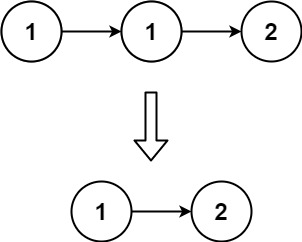

    Input: head = [1,1,2]
    Output: [1,2]
 
Constraints:

    The number of nodes in the list is in the range [0, 300].
    -100 <= Node.val <= 100
    The list is guaranteed to be sorted in ascending order.

In [1]:
def deleteDuplicates(head):
    cur = head
    while cur and cur.next:
        if cur.val == cur.next.val:
            cur.next = cur.next.next
        else:
            cur = cur.next
    return head

## [82. Remove Duplicates from Sorted List II](https://leetcode.com/problems/remove-duplicates-from-sorted-list-ii/)

Medium

Given the head of a sorted linked list, delete all nodes that have duplicate numbers, leaving only distinct numbers from the original list. Return the linked list sorted as well.

Example 1:

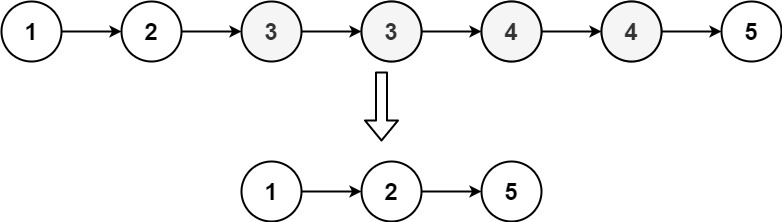

    Input: head = [1,2,3,3,4,4,5]
    Output: [1,2,5]

Constraints:

    The number of nodes in the list is in the range [0, 300].
    -100 <= Node.val <= 100
    The list is guaranteed to be sorted in ascending order.

In [ ]:
# head 有可能被砍掉，所以要用一個 dummy node hold 著整個 list。
# 裡層 while 條件要放 cur 而不是 cur.next 不然 [1, 1] 不會過

def deleteDuplicates(head):
    cur = head
    dummy = prev = ListNode(next=head)

    while cur and cur.next:
        if cur.val == cur.next.val:
            cur_val = cur.val
            while cur and cur.val == cur_val:
                cur = cur.next
            prev.next = cur
        else:
            prev = cur
            cur = cur.next

    return dummy.next

## [206. Reverse Linked List](https://leetcode.com/problems/reverse-linked-list/)

Easy

Given the head of a singly linked list, reverse the list, and return the reversed list.

Example 1:

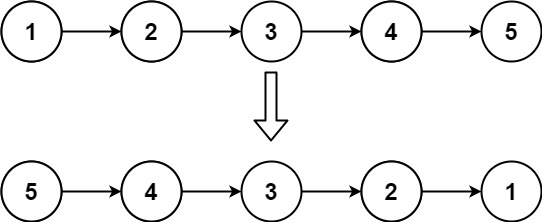

    Input: head = [1,2,3,4,5]
    Output: [5,4,3,2,1]

Constraints:

    The number of nodes in the list is the range [0, 5000].
    -5000 <= Node.val <= 5000


In [ ]:
# Hannah's solution：不改指標而是倒著長一個新的 list

def reverseList(head):
    res = None
    while head:
        res = ListNode(val=head.val, next=res)
        head = head.next
    return res

In [ ]:
# 改指標；迴圈裡用 tmp 寫比較直觀 readable
# 雖然也可以用 tuple unpacking 寫成 cur.next, prev, cur = prev, cur, cur.next

def reverseList(head):
    prev = None
    cur = head
    while cur:
        tmp = cur.next
        cur.next = prev
        prev = cur
        cur = tmp
        
    return prev

In [ ]:
# recursive solution from the repo
# 遞迴呼叫完成時的狀態是 1 -> 2 <- 3 <- 4 <- 5，head 是 1

def reverseList(head):
    if head is None or head.next is None:
        return head

    reverse = reverseList(head.next)
    head.next.next = head
    head.next = None
    
    return reverse

## [92. Reverse Linked List II](https://leetcode.com/problems/reverse-linked-list-ii/)

Medium

Given the head of a singly linked list and two integers left and right where left <= right, reverse the nodes of the list from position left to position right, and return the reversed list.

Example 1:

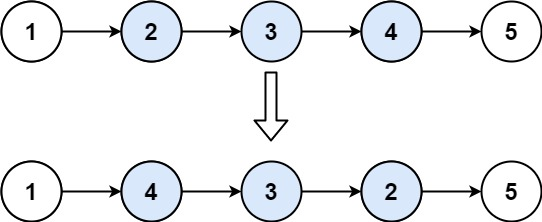

    Input: head = [1,2,3,4,5], left = 2, right = 4
    Output: [1,4,3,2,5]

Constraints:

    The number of nodes in the list is n.
    1 <= n <= 500
    -500 <= Node.val <= 500
    1 <= left <= right <= n
 
Follow up: Could you do it in one pass?

In [ ]:
# Hannah's method：移到 left 之前然後開始倒著長一個新的 list named reverse，最後再接起來
# 為了要接起來要先保留 left 之前的 node（reverse_l）和 reverse 的最後一個 node（reverse_r）
# left 有可能是 1 所以需要用 dummy node hold 著

def reverseBetween(head, left, right):
    cur = dummy = ListNode(next=head)
    for _ in range(left-1):
        cur = cur.next

    reverse_l = cur
    cur = cur.next

    reverse_r = reverse = ListNode(val=cur.val, next=None)
    cur = cur.next
    
    for _ in range(right-left):
        reverse = ListNode(val=cur.val, next=reverse)
        cur = cur.next

    reverse_l.next = reverse
    reverse_r.next = cur

    return dummy.next

In [ ]:
# 改指標

def reverseBetween(head, left, right):
    prev = dummy = ListNode(next=head)
    cur = head
    for _ in range(left-1):
        prev, cur = cur, cur.next

    reverse_l = prev
    reverse_r = cur
    for _ in range(right-left+1):
        tmp = cur.next
        cur.next = prev
        prev = cur
        cur = tmp

    reverse_l.next = prev
    reverse_r.next = cur

    return dummy.next

## [21. Merge Two Sorted Lists](https://leetcode.com/problems/merge-two-sorted-lists/)

Easy

Merge two sorted linked lists and return it as a sorted list. The list should be made by splicing together the nodes of the first two lists. 

Example 1:

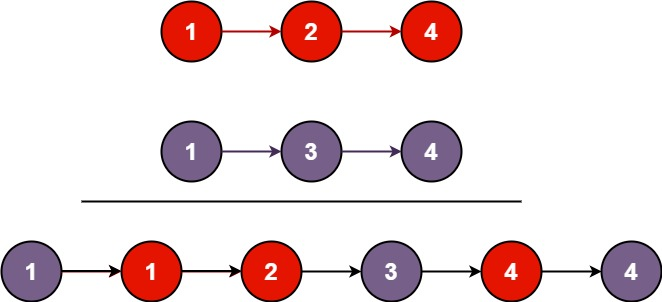

    Input: l1 = [1,2,4], l2 = [1,3,4]
    Output: [1,1,2,3,4,4]

Constraints:

    The number of nodes in both lists is in the range [0, 50].
    -100 <= Node.val <= 100
    Both l1 and l2 are sorted in non-decreasing order.

In [ ]:
# 有可能 l1 l2 都是 empty 所以要用 dummy node

def mergeTwoLists(l1, l2):
    dummy = cur = ListNode()
    while l1 and l2:
        if l1.val < l2.val:
            cur.next = l1
            l1 = l1.next
        else:
            cur.next = l2
            l2 = l2.next

        cur = cur.next

    if not l1:
        cur.next = l2
    if not l2:
        cur.next = l1

    return dummy.next

## [86. Partition List](https://leetcode.com/problems/partition-list/)

Medium

Given the head of a linked list and a value x, partition it such that all nodes less than x come before nodes greater than or equal to x.

You should preserve the original relative order of the nodes in each of the two partitions.

Example 1:

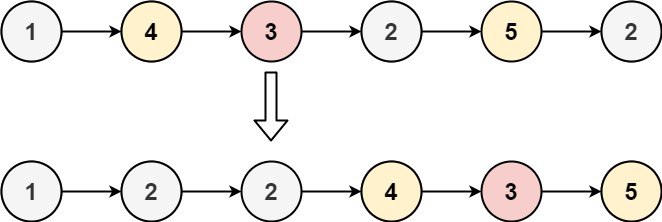

    Input: head = [1,4,3,2,5,2], x = 3
    Output: [1,2,2,4,3,5]

Constraints:

    The number of nodes in the list is in the range [0, 200].
    -100 <= Node.val <= 100
    -200 <= x <= 200

In [ ]:
# 建兩個 list：small 和 large 最後再接起來
# 要記得切斷 large 的尾巴不然 list 會有 cycle

def partition(head, x):
    small_cur = small_dummy = ListNode()
    large_cur = large_dummy = ListNode()
    cur = head
    while cur:
        if cur.val < x:
            small_cur.next = cur
            small_cur = small_cur.next
        else:
            large_cur.next = cur
            large_cur = large_cur.next

        cur = cur.next

    large_cur.next = None
    small_cur.next = large_dummy.next

    return small_dummy.next

## [148. Sort List](https://leetcode.com/problems/sort-list/)

Medium

Given the head of a linked list, return the list after sorting it in ascending order.

Follow up: Can you sort the linked list in O(n logn) time and O(1) memory (i.e. constant space)?

Example 1:

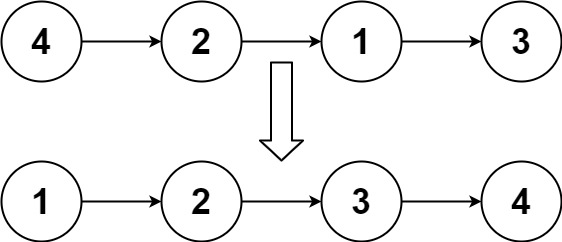

    Input: head = [4,2,1,3]
    Output: [1,2,3,4] 

Constraints:

    The number of nodes in the list is in the range [0, 5 * 10^4].
    -10^5 <= Node.val <= 10^5

In [4]:
# Merge Sort，最下面的 mergeTwoList 是 21 的答案
# 丟進遞迴之前要記得砍斷尾巴
# LeetCode 上比較快的作法都是作弊：先把值抄進 array，排序完再重新造一個 list 回傳

def sortList(head):
    length = 0
    cur = head
    while cur:
        cur = cur.next
        length += 1

    return mergeSort(head, length)

def mergeSort(head, n):        
    if n < 2:
        return head

    prev = dummy = ListNode(next=head)        
    cur = head
    for _ in range(n//2):
        prev, cur = cur, cur.next
    prev.next = None

    l1 = mergeSort(dummy.next, n//2)
    l2 = mergeSort(cur, n-n//2)

    return mergeTwoLists(l1, l2)

* [reorder-list](https://leetcode.com/problems/reorder-list/)
* [linked-list-cycle](https://leetcode.com/problems/linked-list-cycle/)
* [linked-list-cycle-ii](https://leetcode.com/problems/https://leetcode.com/problems/linked-list-cycle-ii/)
* [palindrome-linked-list](https://leetcode.com/problems/palindrome-linked-list/)
* [copy-list-with-random-pointer](https://leetcode.com/problems/copy-list-with-random-pointer/)